In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.image = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(
    faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2]
)

print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 125, 125)


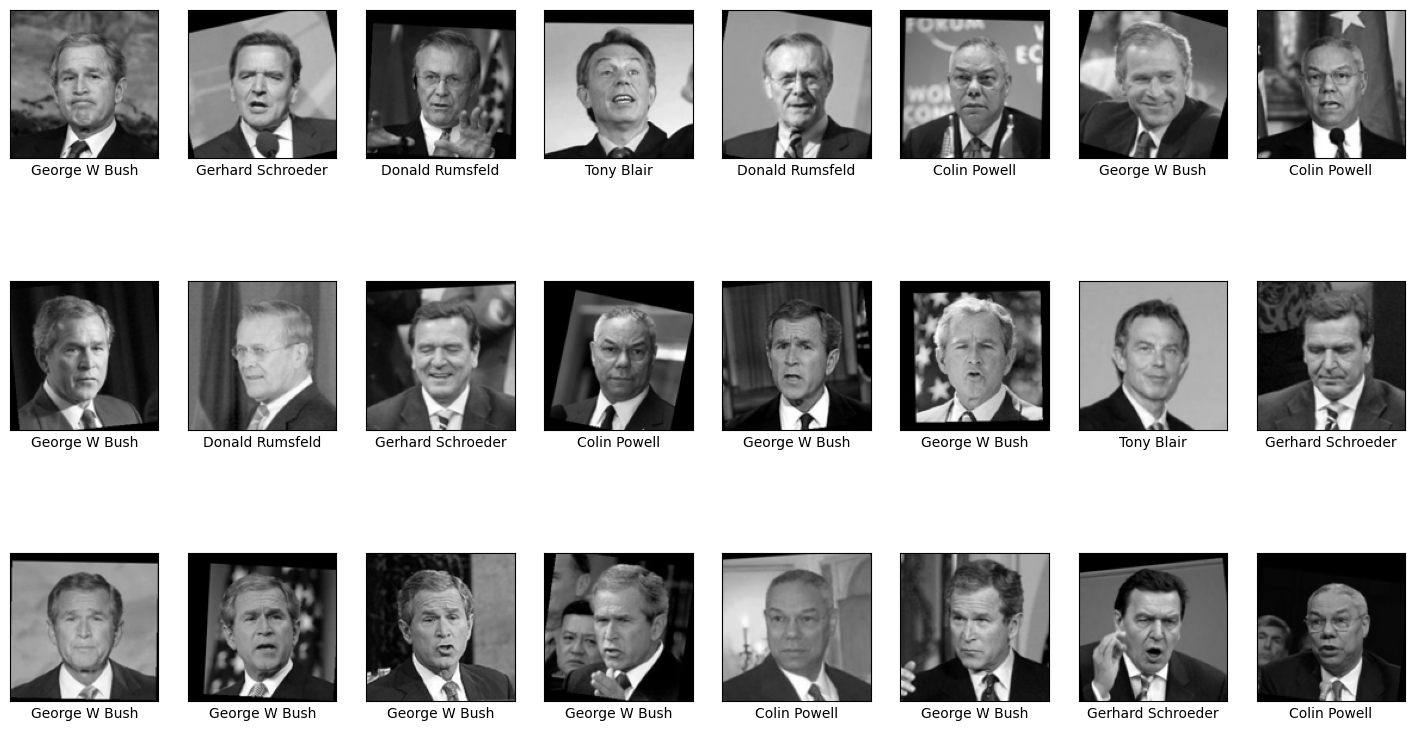

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

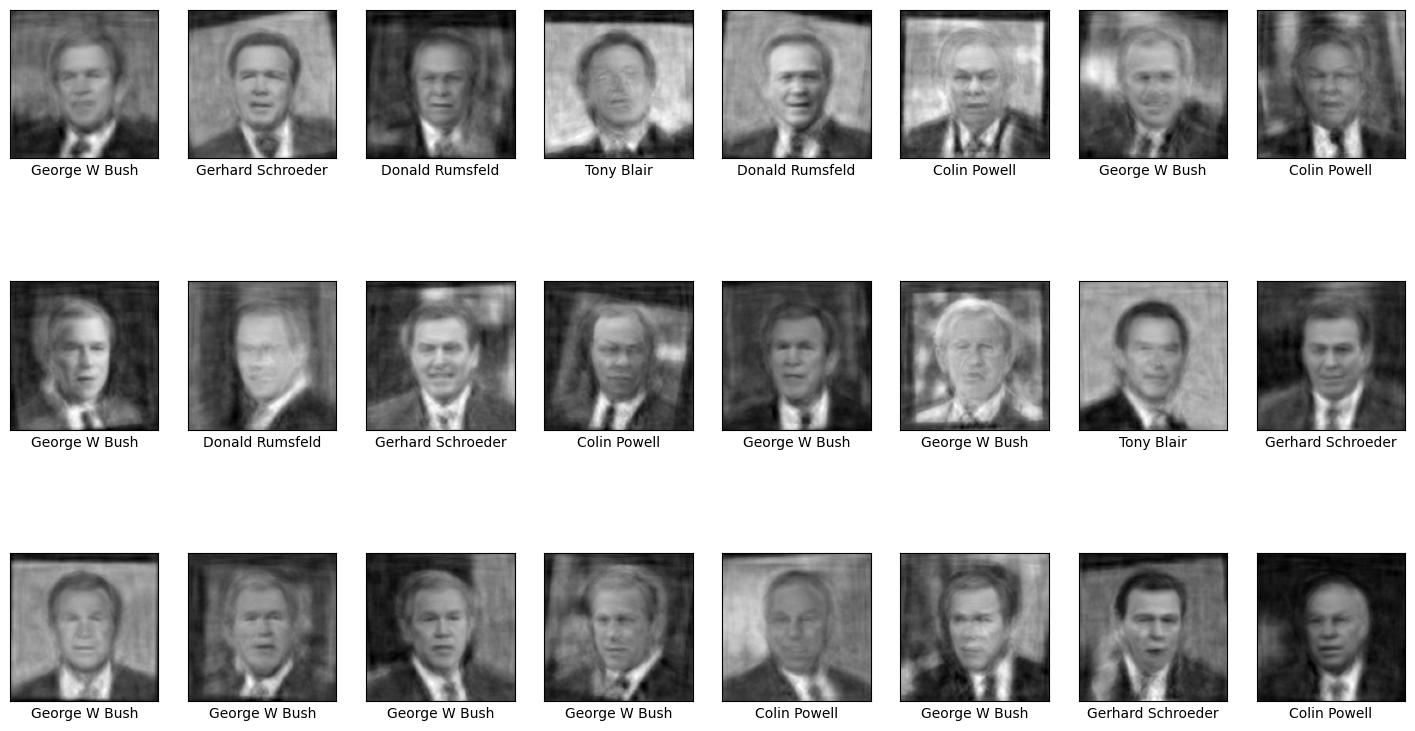

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)

unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 125, 125)


fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [7]:
pca.explained_variance_ratio_

array([0.2678262 , 0.05725306, 0.05121637, 0.04065672, 0.03491619,
       0.02993002, 0.02493127, 0.0194527 , 0.01870102, 0.01703978,
       0.01473362, 0.01436939, 0.01290343, 0.0119282 , 0.01130237,
       0.01008703, 0.00891238, 0.00869186, 0.0081743 , 0.00762327,
       0.00745844, 0.00702986, 0.0068919 , 0.00589468, 0.00557054,
       0.00536163, 0.00512055, 0.00496145, 0.00477149, 0.00454371,
       0.0042985 , 0.00415858, 0.00390861, 0.00388612, 0.00362912,
       0.00357533, 0.00346416, 0.00328576, 0.00322169, 0.00311863,
       0.00297671, 0.00295249, 0.0028676 , 0.00276358, 0.00270941,
       0.00261227, 0.00253184, 0.00246873, 0.00242345, 0.00230984,
       0.0022524 , 0.00217772, 0.00211057, 0.00209594, 0.0020593 ,
       0.00202428, 0.00199986, 0.00192284, 0.00190987, 0.00184261,
       0.00180696, 0.00175553, 0.0017535 , 0.00173538, 0.00170231,
       0.00167856, 0.00164962, 0.00161319, 0.00156877, 0.0015428 ,
       0.00150172, 0.00147773, 0.00146898, 0.00144884, 0.00142

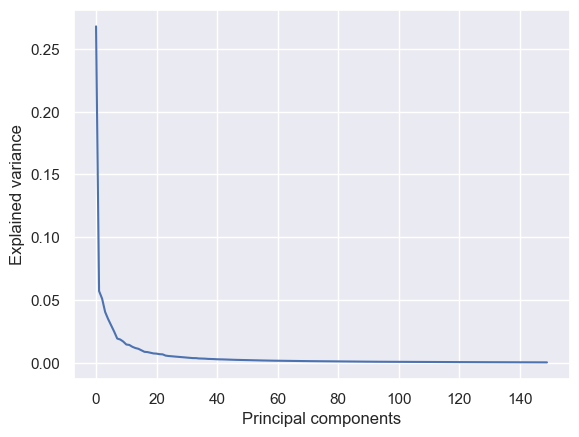

In [10]:
import seaborn as sns

sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal components")
plt.ylabel("Explained variance");

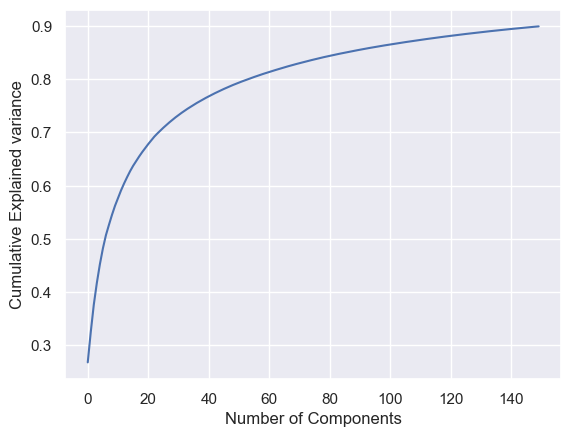

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained variance");

## Filtering noise

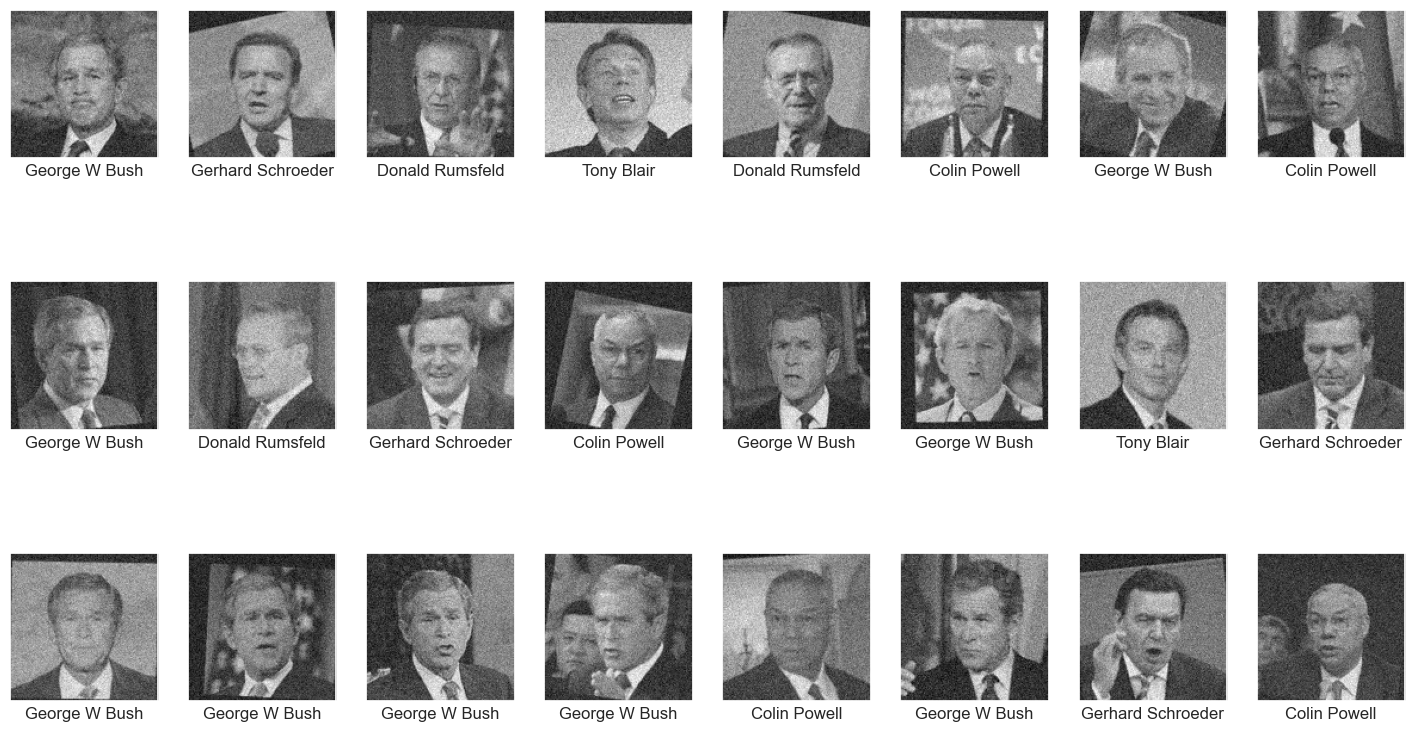

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100, slice_=None)
faces.image = faces.images[:, 35:97, 39:86]
faces.data = faces.images.reshape(
    faces.images.shape[0], faces.images.shape[1] * faces.images.shape[2]
)

np.random.seed(0)
noisy_faces = np.random.normal(faces.data, 0.0765)


fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(noisy_faces[i].reshape(125, 125), cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [17]:
from sklearn.decomposition import PCA

pca = PCA(0.8, random_state=0)
pca_faces = pca.fit_transform(noisy_faces)
pca.n_components_

np.int64(106)

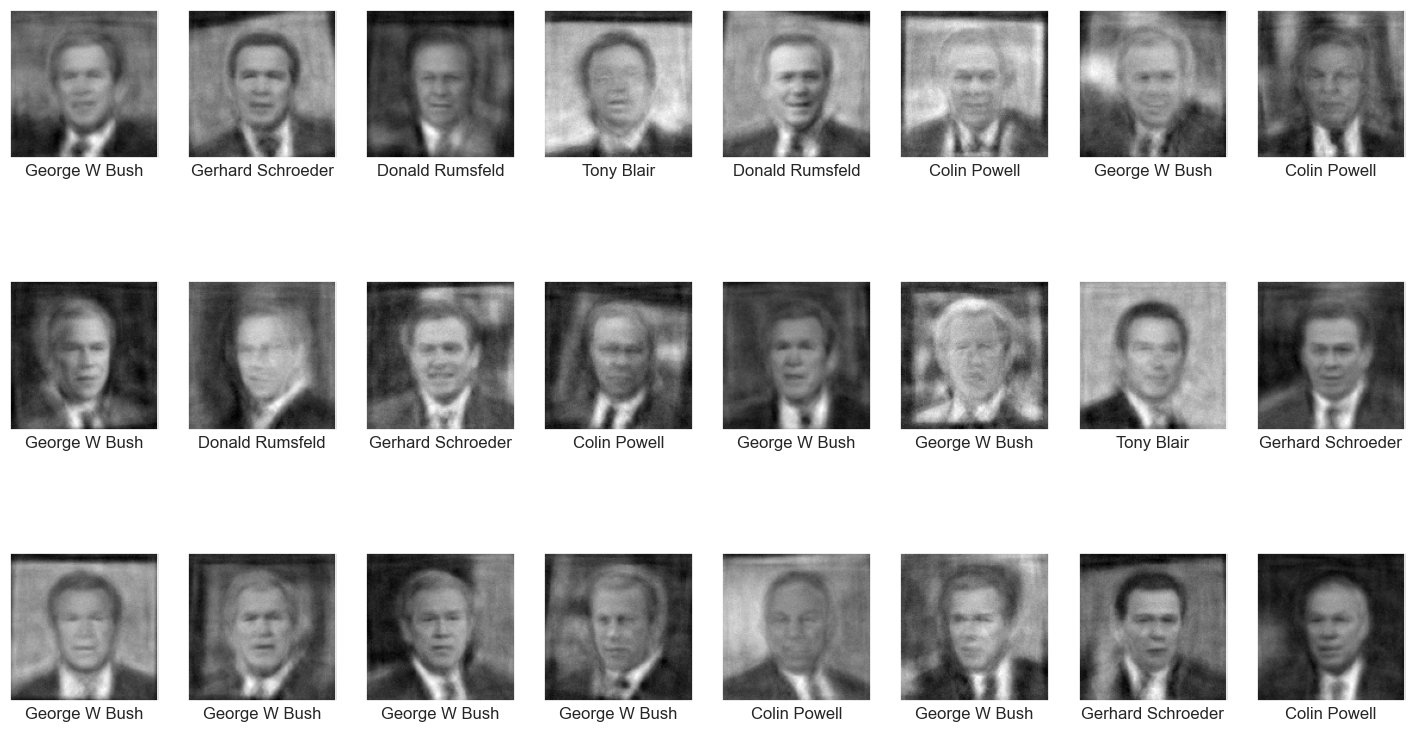

In [18]:
unpca_faces = pca.inverse_transform(pca_faces)

fig, ax = plt.subplots(3, 8, figsize=(18, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i].reshape(125, 125), cmap="gist_gray")
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])